In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick

In [2]:
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  2.0.3
seaborn version :  0.12.2


In [3]:
df = pd.read_csv('Travel.csv')

# Data Pre-Processing

In [4]:
df_prep = df.copy()
df_prep = df_prep.drop(columns='CustomerID')

## Handling Missing Values

In [5]:
#karena nilai missing values tidak ada yang melebihi 10% maka akan didrop
df_prep = df_prep.dropna()

In [6]:
df_prep.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [7]:
df_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4128.0,0.193072,0.394757,0.0,0.0,0.0,0.0,1.0
Age,4128.0,37.231831,9.174521,18.0,31.0,36.0,43.0,61.0
CityTier,4128.0,1.663275,0.920640,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4128.0,15.584787,8.398142,5.0,9.0,14.0,20.0,127.0
NumberOfPersonVisiting,4128.0,2.949370,0.718818,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4128.0,3.741521,1.006786,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4128.0,3.578488,0.795031,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4128.0,3.295300,1.856300,1.0,2.0,3.0,4.0,22.0
Passport,4128.0,0.295300,0.456233,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4128.0,3.060804,1.363064,1.0,2.0,3.0,4.0,5.0


## Handling Duplicates values

In [8]:
print('There is',df.duplicated().sum(),'duplicated value')

There is 0 duplicated value


## Handling Inconsistent Categorical Values

In [9]:
pd.set_option('display.max_rows', 5000)
for i in df.columns:
    if i not in 'CustomerID':
        print(f'''Value count kolom {i}:''')
        print(df[i].value_counts())
        print()
    

Value count kolom ProdTaken:
ProdTaken
0    3968
1     920
Name: count, dtype: int64

Value count kolom Age:
Age
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: count, dtype: int64

Value count kolom TypeofContact:
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

Value count kolom CityTier:
CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64

Value count kolom DurationOfPitch:
DurationOfPitch
9.0      483
7.0      342
8.0      333
6.0      307
16.0     274


Diketahui bahwa ada ketidakkonsistenan pada feature gerder(Fe Male), dan maritalstatus(Singe dengan unmaried yang memiliki definisi sama)

In [10]:
df_prep['Gender'] = df_prep['Gender'].replace('Fe Male', 'Female')
df_prep['MaritalStatus'] = df_prep['MaritalStatus'].replace('Single', 'Unmarried')

In [11]:
handled = ['Gender', 'MaritalStatus']
for i in handled:
    print(f'''Value count kolom {i}:''')
    print(df_prep[i].value_counts())
    print()

Value count kolom Gender:
Gender
Male      2463
Female    1665
Name: count, dtype: int64

Value count kolom MaritalStatus:
MaritalStatus
Married      1990
Unmarried    1349
Divorced      789
Name: count, dtype: int64



## Feature Engineering

### Feature Extraction

Melakukan segmentasi pada feature Age dan Income

In [12]:
def segment(x):
    if x['Age'] <= 21:
        segment = 'Teen'
    elif (x['Age'] >= 21 and x['Age'] <= 55):
        segment = 'Adult'
    else:
        segment = 'Elderly'
    return segment

In [13]:
df_prep['segmentasi_umur'] = df_prep.apply(lambda x: segment(x), axis=1)
df_prep.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,segmentasi_umur
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,Adult
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Adult
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,Adult
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Adult
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Unmarried,1.0,0,5,1,1.0,Executive,18068.0,Adult


In [14]:
def segmentasi_income(a):
        if a['MonthlyIncome'] <= 1045:
            segmentasi = 'Low Income'
        elif 1046 <= a['MonthlyIncome'] <= 1275:
            segmentasi = 'Middle Income'
        else:
            segmentasi = 'High Income'
        return segmentasi

In [15]:
df_prep['segmentasi_income'] = df_prep.apply(lambda x: segmentasi_income(x), axis=1)
df_prep.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,segmentasi_umur,segmentasi_income
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,...,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,Adult,High Income
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Adult,High Income
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,...,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,Adult,High Income
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Adult,High Income
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,...,Unmarried,1.0,0,5,1,1.0,Executive,18068.0,Adult,High Income


### Feature Encoding

In [16]:
# Label Encoding
df_prep['segmentasi_umur'] = df_prep['segmentasi_umur'].map({'Teen':0,
                                                            'Adult':1,
                                                            'Elderly':2})
df_prep['segmentasi_income'] =  df_prep['segmentasi_income'].map({'Low Income':0,
                                                          'Middle Income':1,
                                                          'High Income':2})

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
#One hot encoding
encoder = OneHotEncoder(sparse=False)
for cat in ['TypeofContact', 'Occupation', 'MaritalStatus','Designation','Gender','ProductPitched']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df_prep = df_prep.join(onehots)

### Split Train & Test

In [19]:
X = df_prep.select_dtypes(exclude=object).drop(columns='ProdTaken') # menggunakan semua feature kecuali target
y = df_prep['ProdTaken']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42) #Splitting 

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2889, 37) (1239, 37) (2889,) (1239,)


### Remove outliers on Train dataset

In [22]:
from scipy import stats

In [23]:
data_train = pd.concat([X_train, y_train], axis=1)

f_outlier = np.array([True] * len(data_train))
outlier_cols = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']

for col in outlier_cols:
    z_scores = abs(stats.zscore(data_train[col]))
    f_outlier = f_outlier & (z_scores < 3)

data_train = data_train[f_outlier]

X_train = data_train.drop("ProdTaken", axis=1)
y_train = data_train.ProdTaken

### Feature Transformation on Training and Testing Dataset

In [24]:
from sklearn.preprocessing import RobustScaler

In [25]:
# Create a train and test dataset
data_train = pd.concat([X_train, y_train], axis=1)
data_test  = pd.concat([X_test, y_test], axis=1)

# Standardize the data using robust scaler
scaler = RobustScaler()
scaler.fit(data_train)
std_train = scaler.transform(data_train)
std_test  = scaler.transform(data_test)

# Turn into data frame
std_train = pd.DataFrame(std_train, columns=data_train.columns)
std_test  = pd.DataFrame(std_test, columns=data_test.columns)

# Re-split the data
X_train_std = std_train.drop("ProdTaken", axis=1)
y_train_std = std_train.ProdTaken
X_test_std  = std_test.drop("ProdTaken", axis=1)
y_test_std  = std_test.ProdTaken


In [26]:
print(X_train_std.shape, y_train_std.shape, X_test_std.shape, y_test_std.shape)

(2877, 37) (2877,) (1239, 37) (1239,)


In [27]:
X_train_std.isna().sum()

Age                              0
CityTier                         0
DurationOfPitch                  0
NumberOfPersonVisiting           0
NumberOfFollowups                0
PreferredPropertyStar            0
NumberOfTrips                    0
Passport                         0
PitchSatisfactionScore           0
OwnCar                           0
NumberOfChildrenVisiting         0
MonthlyIncome                    0
segmentasi_umur                  0
segmentasi_income                0
TypeofContact_Company Invited    0
TypeofContact_Self Enquiry       0
Occupation_Free Lancer           0
Occupation_Large Business        0
Occupation_Salaried              0
Occupation_Small Business        0
MaritalStatus_Divorced           0
MaritalStatus_Married            0
MaritalStatus_Single             0
MaritalStatus_Unmarried          0
Designation_AVP                  0
Designation_Executive            0
Designation_Manager              0
Designation_Senior Manager       0
Designation_VP      

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

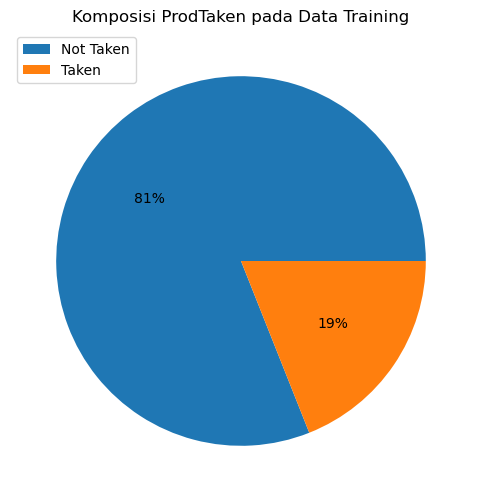

In [29]:
plt.figure(figsize=(6, 6))
plt.pie(y_train_std.value_counts(), autopct='%1.0f%%')
plt.title('Komposisi ProdTaken pada Data Training')
plt.legend(labels=['Not Taken', 'Taken'], loc='upper left')

plt.show()

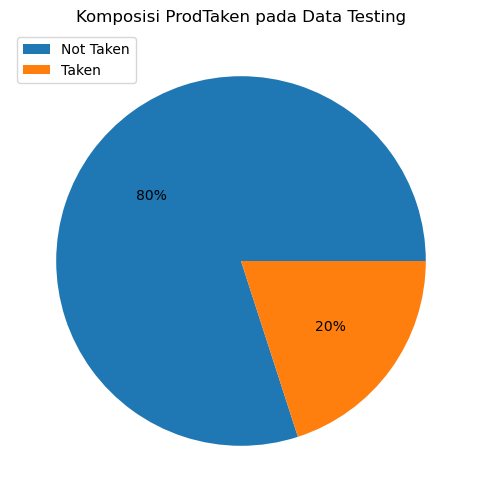

In [30]:
plt.figure(figsize=(6, 6))
plt.pie(y_test_std.value_counts(), autopct='%1.0f%%')
plt.title('Komposisi ProdTaken pada Data Testing')
plt.legend(labels=['Not Taken', 'Taken'], loc='upper left')

plt.show()

Karena adanya imbalace pada target di data training dan data test make perlu dilakukan handling imbalance class

### Handling Imbalanced Dataset

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
X_train_bal, y_train_bal = SMOTE(sampling_strategy=0.5).fit_resample(X_train_std, y_train_std)

In [33]:
y_train_bal.value_counts()

ProdTaken
0.0    2331
1.0    1165
Name: count, dtype: int64